In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (25., 10.)

In [3]:
df = pd.read_csv('../data/curated-submission-tag-2016-2020.csv')

In [4]:
df.head()

,text,flair,comments,url,score,title,curated_tag
0,"This story needs a little setup, so bear with ...",not the a-hole,"[""No, you're not the asshole here.\n\nIt's per...",https://www.reddit.com/r/AmItheAsshole/comment...,43,AITA for not wanting my roommate to bring gues...,NTA
1,[Here's the thread.](https://www.reddit.com/r/...,not the a-hole,"[""holy fuck that's a lot of rules. You're not ...",https://www.reddit.com/r/AmItheAsshole/comment...,17,AITA in this thread where a mod ended up banni...,NTA
2,I was having a conversation with my friend las...,not the a-hole,"['Not an asshole, but perhaps a little clueles...",https://www.reddit.com/r/AmItheAsshole/comment...,16,AITA for assuming my friend was talking behind...,NTA
3,So school started up last week on Wednesday an...,everyone sucks,"[""That was pretty dickish of the teacher, but ...",https://www.reddit.com/r/AmItheAsshole/comment...,20,AITA for not doing my homework?,ESH
4,I received an e-invite to a get together with ...,not the a-hole,"[""Doesn't seem like you not going actually neg...",https://www.reddit.com/r/AmItheAsshole/comment...,35,AITA for not going to this work event?,NTA


In [5]:
import ast
comment_lengths = []
for i, row in df.iterrows():
    comment_lengths.append(len(ast.literal_eval(row.comments)))

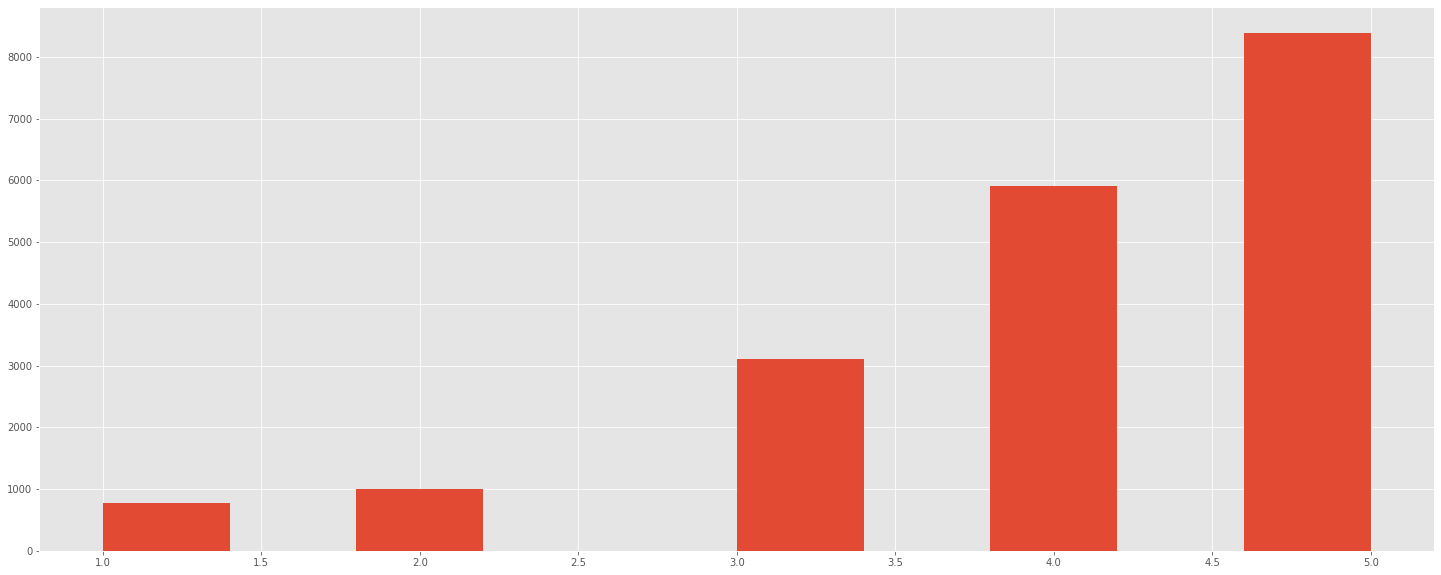

In [6]:
plt.hist(comment_lengths)
plt.show()

In [7]:
esh_regexes = [
    r'\besh\b',
    r'everyone sucks',
    r'everyone[*a-z\' ,]*(shit|a[s*-]*hole)',
    r'You[a-z\' ,]* all [*a-z\' ,]+a[s*-]*hole'
]
nah_regexes = [
    r'\bnah\b',
    r'no a[s*-]*hole\s here',
    r'anyone[*a-z\' ,]*a[s*-]+hole'
]
nta_regexes = [
    r'\bnta\b',
    r'not[a-z*\' ,]*a[s*-]+hole'
]
yta_regexes = [
    r'\byta\b',
    r'you[a-z*\' ,]*a[s*-]+hole'
]

mapper = {
    'NTA': nta_regexes,
    'YTA': yta_regexes,
    'NAH': nah_regexes,
    'ESH': esh_regexes
}

Find the first comment that agrees with the curated tag based on the regex searches

In [13]:
import re

target_comments = []
for i, row in df.iterrows():
    comments = ast.literal_eval(row.comments)
    found_comment = False
    for comment in comments:
        try:
            for regex in mapper[row.curated_tag]:
                if re.search(regex, comment, re.IGNORECASE):
                    comments.append(comment)
                    found_comment = True
            if found_comment:
                target_comments.append(comment)
                break
        except KeyError:
            pass
    if not found_comment:
        target_comments.append('')

In [14]:
len(target_comments)

19174

In [15]:
df['target_comment'] = pd.Series(target_comments)

df.head()

,text,flair,comments,url,score,title,curated_tag,target_comment
0,"This story needs a little setup, so bear with ...",not the a-hole,"[""No, you're not the asshole here.\n\nIt's per...",https://www.reddit.com/r/AmItheAsshole/comment...,43,AITA for not wanting my roommate to bring gues...,NTA,"No, you're not the asshole here.\n\nIt's perfe..."
1,[Here's the thread.](https://www.reddit.com/r/...,not the a-hole,"[""holy fuck that's a lot of rules. You're not ...",https://www.reddit.com/r/AmItheAsshole/comment...,17,AITA in this thread where a mod ended up banni...,NTA,holy fuck that's a lot of rules. You're not th...
2,I was having a conversation with my friend las...,not the a-hole,"['Not an asshole, but perhaps a little clueles...",https://www.reddit.com/r/AmItheAsshole/comment...,16,AITA for assuming my friend was talking behind...,NTA,"Not an asshole, but perhaps a little clueless?..."
3,So school started up last week on Wednesday an...,everyone sucks,"[""That was pretty dickish of the teacher, but ...",https://www.reddit.com/r/AmItheAsshole/comment...,20,AITA for not doing my homework?,ESH,
4,I received an e-invite to a get together with ...,not the a-hole,"[""Doesn't seem like you not going actually neg...",https://www.reddit.com/r/AmItheAsshole/comment...,35,AITA for not going to this work event?,NTA,Doesn't seem like you not going actually negat...


In [16]:
df = df.drop(df[df.target_comment == ''].index)
df.head()

,text,flair,comments,url,score,title,curated_tag,target_comment
0,"This story needs a little setup, so bear with ...",not the a-hole,"[""No, you're not the asshole here.\n\nIt's per...",https://www.reddit.com/r/AmItheAsshole/comment...,43,AITA for not wanting my roommate to bring gues...,NTA,"No, you're not the asshole here.\n\nIt's perfe..."
1,[Here's the thread.](https://www.reddit.com/r/...,not the a-hole,"[""holy fuck that's a lot of rules. You're not ...",https://www.reddit.com/r/AmItheAsshole/comment...,17,AITA in this thread where a mod ended up banni...,NTA,holy fuck that's a lot of rules. You're not th...
2,I was having a conversation with my friend las...,not the a-hole,"['Not an asshole, but perhaps a little clueles...",https://www.reddit.com/r/AmItheAsshole/comment...,16,AITA for assuming my friend was talking behind...,NTA,"Not an asshole, but perhaps a little clueless?..."
4,I received an e-invite to a get together with ...,not the a-hole,"[""Doesn't seem like you not going actually neg...",https://www.reddit.com/r/AmItheAsshole/comment...,35,AITA for not going to this work event?,NTA,Doesn't seem like you not going actually negat...
5,"I work at a charity shop, so it's unpaid volun...",not the a-hole,"[""Only an asshole if you wait until the last m...",https://www.reddit.com/r/AmItheAsshole/comment...,38,AITA if I tell a white lie to get out of work?,NTA,"Not an asshole. You're volunteering, they are..."


In [17]:
filtered_df = pd.DataFrame({
    'text': df['text'],
    'target-tag': df['curated_tag'],
    'target-comment': df['target_comment']
})

filtered_df.head()

,text,target-tag,target-comment
0,"This story needs a little setup, so bear with ...",NTA,"No, you're not the asshole here.\n\nIt's perfe..."
1,[Here's the thread.](https://www.reddit.com/r/...,NTA,holy fuck that's a lot of rules. You're not th...
2,I was having a conversation with my friend las...,NTA,"Not an asshole, but perhaps a little clueless?..."
4,I received an e-invite to a get together with ...,NTA,Doesn't seem like you not going actually negat...
5,"I work at a charity shop, so it's unpaid volun...",NTA,"Not an asshole. You're volunteering, they are..."


In [18]:
filtered_df.to_csv('../data/filtered-dataset-2016-2020')